In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel("C:\Личные документы\data\_nornik.xlsx").set_index('Date')
df = df.drop('Deals', axis=1)
df.head(3)

,Value
Date,
2023-08-17,15924
2023-08-18,16198
2023-08-21,16262


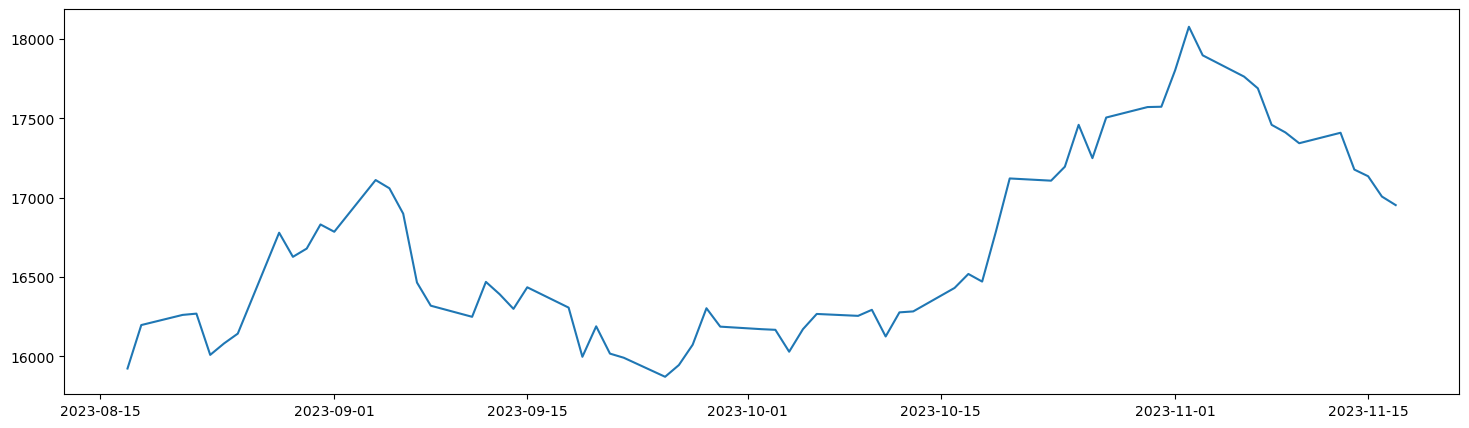

In [9]:
plt.plot(df['Value'])
plt.show()

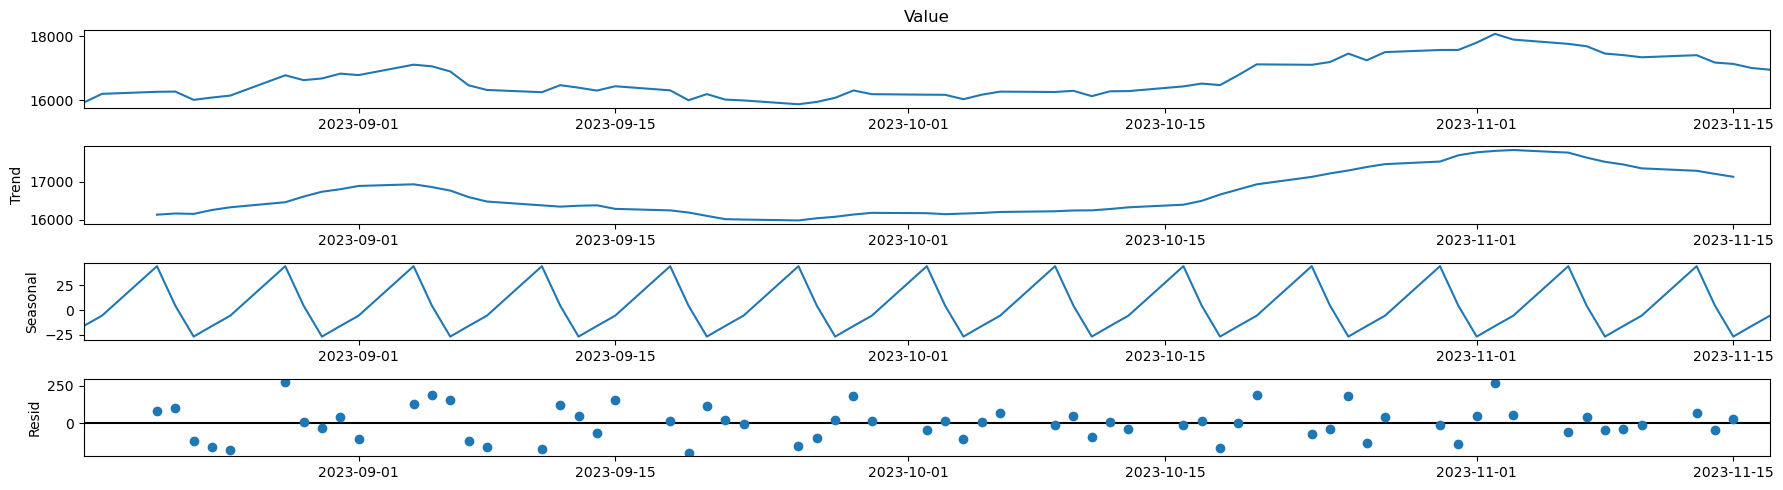

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Value'])
fig = decomposition.plot()
plt.show()

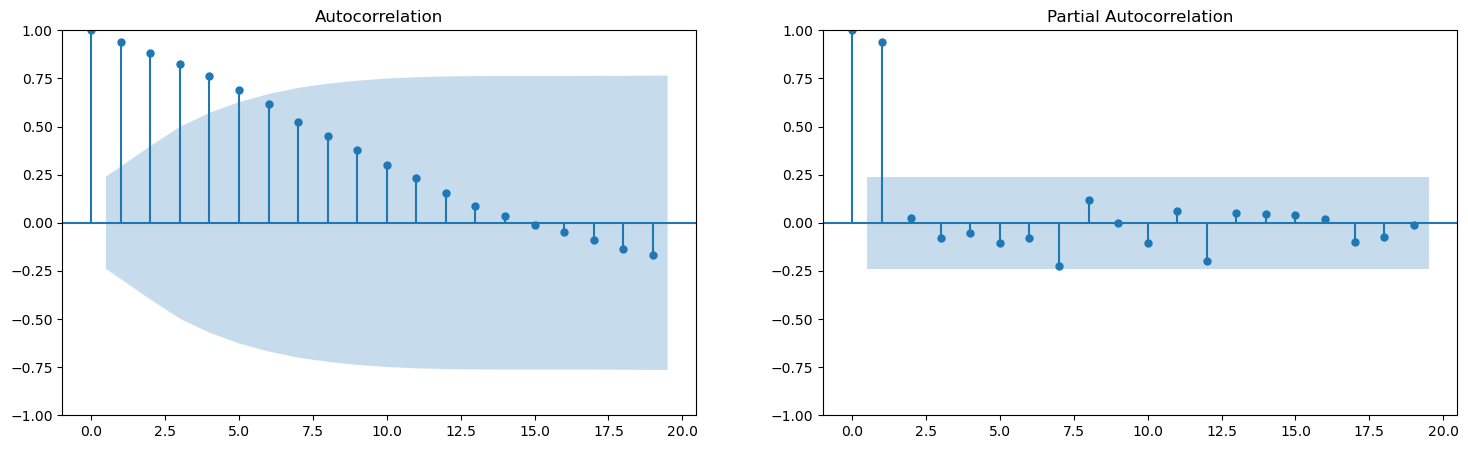

In [5]:
import statsmodels.graphics.tsaplots as sgt

def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, ax=axes[0])
    sgt.plot_pacf(series, ax=axes[1], method='ywm')
    plt.show()

plot_acf_pacf(df['Value'])

In [11]:
from statsmodels.tsa.stattools import adfuller
stats = adfuller(df) # Исходный ряд
print("adf: ", stats[0])
print("p-value: ", stats[1])
print("Critical values: ", stats[4])
if stats[0] > stats[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

print()
    
from statsmodels.tsa.stattools import adfuller
stats = adfuller(df.diff().dropna()) # Исходный ряд
print("adf: ", stats[0])
print("p-value: ", stats[1])
print("Critical values: ", stats[4])
if stats[0] > stats[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  -1.5395352016096284
p-value:  0.5138711420851866
Critical values:  {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
ряд нестационарен

adf:  -7.988804805426907
p-value:  2.5066452655360256e-12
Critical values:  {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}
ряд стационарен


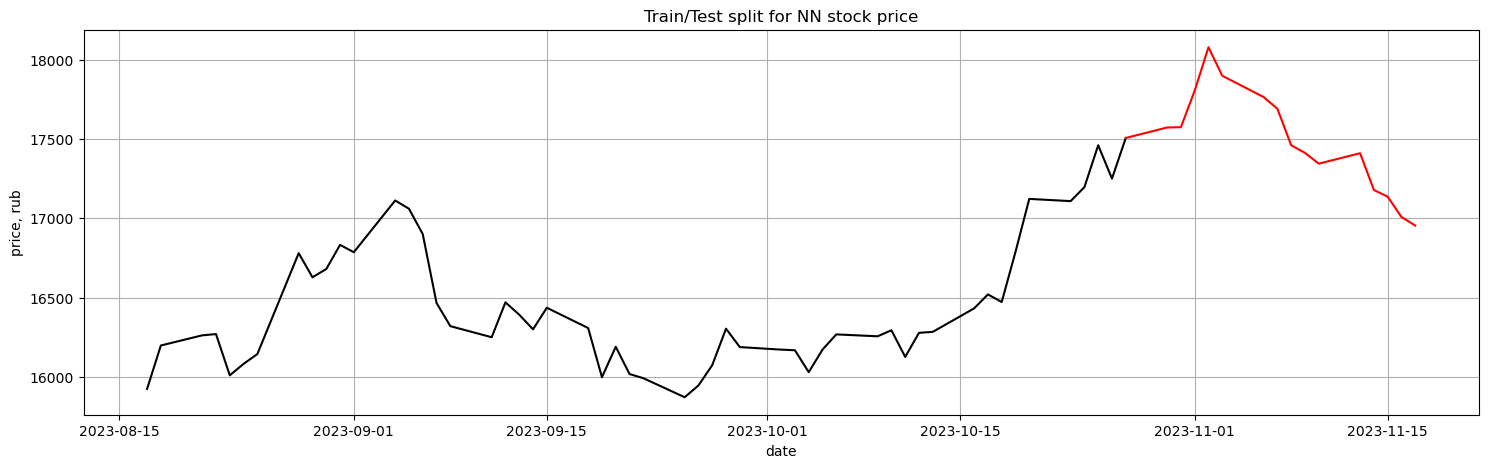

In [65]:
train = df[df.index <= pd.to_datetime('2023-10-27', format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime('2023-10-27', format='%Y-%m-%d')]
plt.plot(train, color='black')
plt.plot(test, color='red')
plt.ylabel('price, rub')
plt.xlabel('date')
plt.title("Train/Test split for NN stock price")
plt.grid()
plt.show()

In [155]:
def get_ma(train, test):
    test_1 = test.copy()
    test_1['Value'] = 0
    new = pd.concat([train, test_1])
    result = []
    for i in range(new.shape[0]):
        if i < train.shape[0]:
            pass
        else:
            result.append((new.iloc[i-3] + new.iloc[i-2] + new.iloc[i-1]) / 3)
            new.iloc[i] = (new.iloc[i-3] + new.iloc[i-2] + new.iloc[i-1]) / 3
    return pd.DataFrame(result, index=test.index)

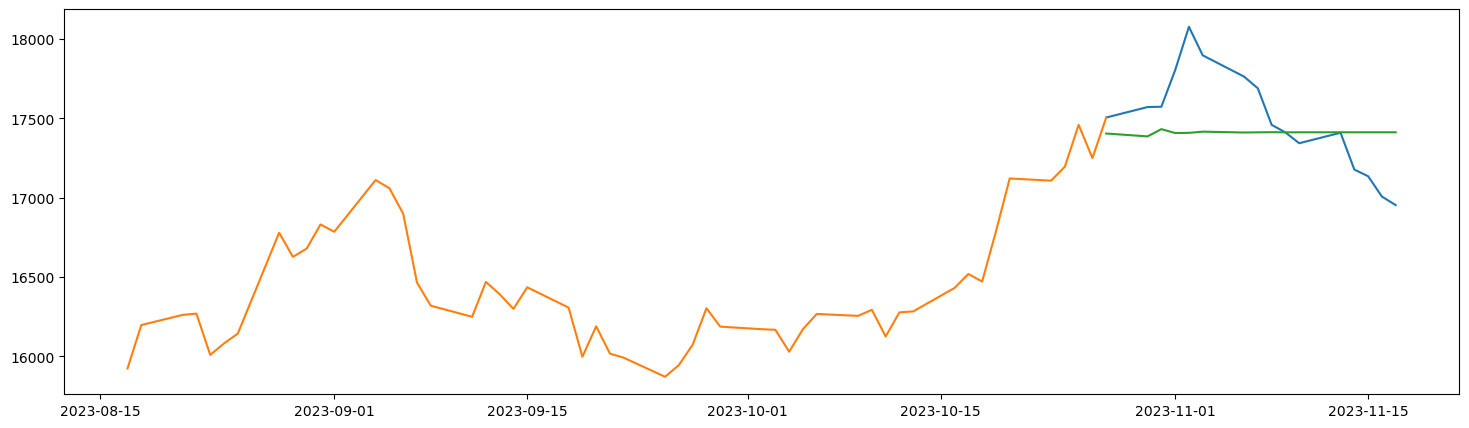

In [156]:
test_1 = get_ma(train, test)

plt.plot(test)
plt.plot(train)
plt.plot(test_1)

c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
c:\Users\AubakirovMA\AppData\Local\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


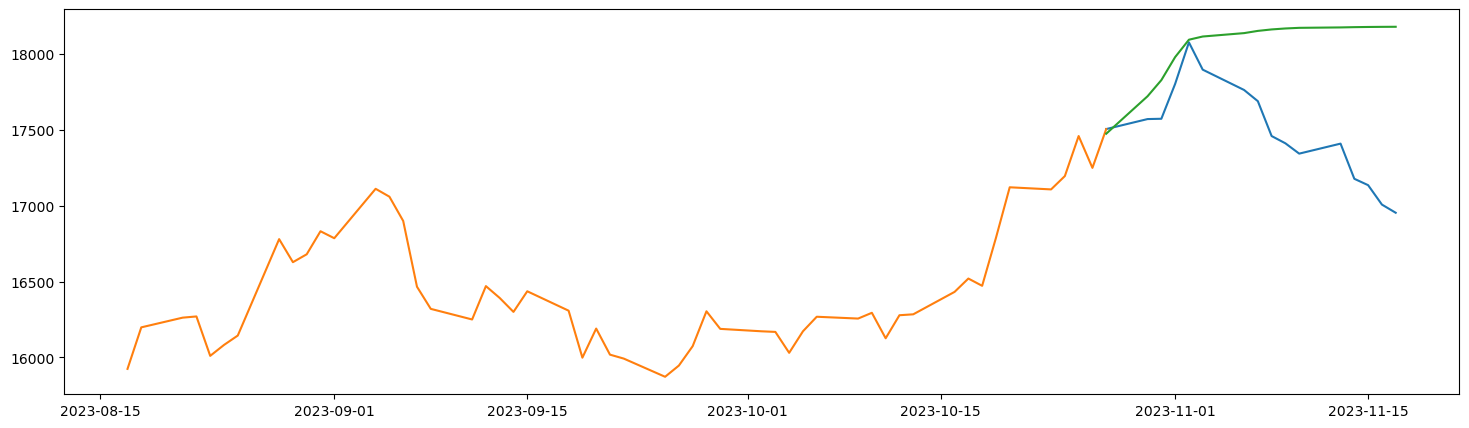

In [204]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(1, 1, 6), seasonal_order=(0, 0, 0, 0)).fit(maxiter=100)
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.plot(test)
plt.plot(train)
plt.plot(pred)